<a href="https://colab.research.google.com/github/Krishna-Bagaria/Tiny-ImageNet/blob/master/krishna_subchallenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
ROOT = "/content/drive" 
drive.mount(ROOT) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from os.path import join
PROJ = "My Drive/IP_Project/"
PROJECT_PATH = join(ROOT, PROJ)

In [0]:
import numpy as np
import pandas as pd
import codecs
import pickle
import pandas_profiling
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
import os
from sklearn import linear_model

In [0]:
import os

dataset_path = PROJECT_PATH + 'dataset'
results_path = PROJECT_PATH + 'result'
object_path = PROJECT_PATH + 'pickle/'
cell_lines_path = dataset_path+ '/Data/single_cell_phospo/complete_cell_lines'

In [0]:
types = {'cellID':'uint16','time':'float16', 'treatment':'category', 'cell_line':'category',
        'fileID':'uint16','b.CATENIN':'float16','cleavedCas':'float16', 
         'CyclinB':'float16', 'GAPDH':'float16', 'IdU':'float16',
         'Ki.67':'float16', 'p.4EBP1':'float16','p.Akt.Ser473.':'float16',
         'p.AKT.Thr308.':'float16', 'p.AMPK':'float16', 'p.BTK':'float16', 
         'p.CREB':'float16', 'p.ERK':'float16', 'p.FAK':'float16', 'p.GSK3b':'float16',
         'p.H3':'float16', 'p.HER2':'float16', 'p.JNK':'float16', 'p.MAP2K3':'float16',
         'p.MAPKAPK2':'float16','p.MEK':'float16', 'p.MKK3.MKK6':'float16',
         'p.MKK4':'float16', 'p.NFkB':'float16', 'p.p38':'float16', 'p.p53':'float16',
         'p.p90RSK':'float16', 'p.PDPK1':'float16', 'p.PLCg2':'float16', 'p.RB':'float16',
         'p.S6':'float16', 'p.S6K':'float16', 'p.SMAD23':'float16','p.SRC':'float16', 
         'p.STAT1':'float16', 'p.STAT3':'float16', 'p.STAT5':'float16'}

files = [file for file in os.listdir(cell_lines_path) if file.endswith('.csv')]

In [0]:
np.random.shuffle(files)

In [0]:
cell_lines_data = pd.concat([pd.read_csv(f'{cell_lines_path}/{file}', dtype=types, sep=',') for file in files])

KeyboardInterrupt: ignored

In [0]:

cell_lines_data['cell_line'] = cell_lines_data['cell_line'].astype('category')

In [0]:
def save_df(x, file_name, path):
  """
  path: end with /
  """
  x.to_pickle(path + file_name + '.pickle') # /pickel/filename.pickle
  return

def read_df(file_name, path):
  return pd.read_pickle(path + file_name + '.pickle')  

In [0]:
### SAVE cell_lines_data into pickle
save_df(cell_lines_data, 'cell_lines_data', object_path)

In [0]:
### READ cell_lines_data 
cell_lines_data = read_df('cell_lines_data', object_path)

In [0]:

cell_lines_data.columns.values

array(['treatment', 'cell_line', 'time', 'cellID', 'fileID', 'b.CATENIN',
       'cleavedCas', 'CyclinB', 'GAPDH', 'IdU', 'Ki.67', 'p.4EBP1',
       'p.Akt.Ser473.', 'p.AKT.Thr308.', 'p.AMPK', 'p.BTK', 'p.CREB',
       'p.ERK', 'p.FAK', 'p.GSK3b', 'p.H3', 'p.HER2', 'p.JNK', 'p.MAP2K3',
       'p.MAPKAPK2', 'p.MEK', 'p.MKK3.MKK6', 'p.MKK4', 'p.NFkB', 'p.p38',
       'p.p53', 'p.p90RSK', 'p.PDPK1', 'p.PLCg2', 'p.RB', 'p.S6', 'p.S6K',
       'p.SMAD23', 'p.SRC', 'p.STAT1', 'p.STAT3', 'p.STAT5'], dtype=object)

In [0]:
cell_lines_data.drop(labels=['cell_line', 'cellID', 'fileID'], axis=1, inplace=True)

In [0]:
cell_lines_data.shape

(17126329, 39)

In [0]:
cell_lines_data.head()

,treatment,time,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,p.AKT.Thr308.,p.AMPK,p.BTK,p.CREB,p.ERK,p.FAK,p.GSK3b,p.H3,p.HER2,p.JNK,p.MAP2K3,p.MAPKAPK2,p.MEK,p.MKK3.MKK6,p.MKK4,p.NFkB,p.p38,p.p53,p.p90RSK,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
0,iEGFR,0.0,0.224731,3.880859,3.515625,3.111328,5.035156,4.328125,5.464844,2.771484,4.179688,4.613281,3.974609,1.921875,3.853516,3.212891,3.789062,2.675781,5.250000,2.013672,2.431641,3.314453,3.285156,3.335938,4.574219,3.560547,2.750000,3.898438,4.324219,3.044922,2.609375,3.144531,6.890625,2.902344,3.041016,3.572266,3.798828,3.156250,2.398438
1,iEGFR,0.0,0.224731,3.085938,3.195312,2.558594,10.609375,3.619141,3.343750,1.067383,2.070312,4.367188,2.929688,0.342773,2.320312,2.113281,1.101562,2.767578,5.046875,2.738281,1.635742,1.794922,1.013672,2.130859,3.101562,2.535156,1.528320,1.057617,2.595703,2.421875,1.888672,5.363281,4.437500,2.193359,2.156250,2.388672,1.646484,1.816406,2.023438
2,iEGFR,0.0,1.899414,2.871094,6.238281,3.951172,10.554688,6.113281,5.304688,3.457031,3.386719,4.359375,4.750000,2.572266,4.703125,2.613281,4.226562,4.105469,5.210938,3.359375,1.619141,2.826172,3.751953,3.501953,4.695312,4.234375,3.449219,3.546875,5.609375,2.972656,3.335938,7.726562,7.800781,3.490234,3.572266,3.080078,4.011719,3.310547,2.582031
3,iEGFR,0.0,0.788574,3.222656,4.851562,2.923828,7.660156,4.078125,3.630859,2.345703,1.743164,3.556641,2.837891,1.732422,3.669922,1.076172,2.837891,2.386719,4.355469,1.123047,2.677734,2.876953,2.591797,1.801758,4.039062,3.484375,2.916016,2.841797,4.406250,2.085938,2.611328,6.042969,5.453125,3.289062,1.463867,2.203125,2.658203,2.253906,2.287109
4,iEGFR,0.0,1.597656,3.281250,2.759766,2.951172,5.820312,3.822266,4.101562,2.798828,2.896484,4.160156,3.496094,0.916504,3.957031,1.299805,3.333984,3.568359,5.699219,2.955078,1.868164,2.279297,2.439453,2.007812,4.011719,2.929688,2.890625,2.318359,3.806641,2.931641,2.583984,5.187500,5.460938,2.619141,1.687500,3.349609,2.414062,3.058594,2.208984


In [0]:
### Convert 'treatment'
cell_lines_data = pd.concat([cell_lines_data, pd.get_dummies(cell_lines_data[['treatment']])], axis=1)

In [0]:
cell_lines_data.shape

(17126329, 45)

In [0]:
cell_lines_data.drop(labels=['treatment'], axis=1, inplace=True)

In [0]:
cell_lines_data.head()

,time,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,p.AKT.Thr308.,p.AMPK,p.BTK,p.CREB,p.ERK,p.FAK,p.GSK3b,p.H3,p.HER2,p.JNK,p.MAP2K3,p.MAPKAPK2,p.MEK,p.MKK3.MKK6,p.MKK4,p.NFkB,p.p38,p.p53,p.p90RSK,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5,treatment_iEGFR,treatment_iMEK,treatment_iPI3K,treatment_iPKC,treatment_EGF,treatment_full
0,0.0,0.224731,3.880859,3.515625,3.111328,5.035156,4.328125,5.464844,2.771484,4.179688,4.613281,3.974609,1.921875,3.853516,3.212891,3.789062,2.675781,5.250000,2.013672,2.431641,3.314453,3.285156,3.335938,4.574219,3.560547,2.750000,3.898438,4.324219,3.044922,2.609375,3.144531,6.890625,2.902344,3.041016,3.572266,3.798828,3.156250,2.398438,1,0,0,0,0,0
1,0.0,0.224731,3.085938,3.195312,2.558594,10.609375,3.619141,3.343750,1.067383,2.070312,4.367188,2.929688,0.342773,2.320312,2.113281,1.101562,2.767578,5.046875,2.738281,1.635742,1.794922,1.013672,2.130859,3.101562,2.535156,1.528320,1.057617,2.595703,2.421875,1.888672,5.363281,4.437500,2.193359,2.156250,2.388672,1.646484,1.816406,2.023438,1,0,0,0,0,0
2,0.0,1.899414,2.871094,6.238281,3.951172,10.554688,6.113281,5.304688,3.457031,3.386719,4.359375,4.750000,2.572266,4.703125,2.613281,4.226562,4.105469,5.210938,3.359375,1.619141,2.826172,3.751953,3.501953,4.695312,4.234375,3.449219,3.546875,5.609375,2.972656,3.335938,7.726562,7.800781,3.490234,3.572266,3.080078,4.011719,3.310547,2.582031,1,0,0,0,0,0
3,0.0,0.788574,3.222656,4.851562,2.923828,7.660156,4.078125,3.630859,2.345703,1.743164,3.556641,2.837891,1.732422,3.669922,1.076172,2.837891,2.386719,4.355469,1.123047,2.677734,2.876953,2.591797,1.801758,4.039062,3.484375,2.916016,2.841797,4.406250,2.085938,2.611328,6.042969,5.453125,3.289062,1.463867,2.203125,2.658203,2.253906,2.287109,1,0,0,0,0,0
4,0.0,1.597656,3.281250,2.759766,2.951172,5.820312,3.822266,4.101562,2.798828,2.896484,4.160156,3.496094,0.916504,3.957031,1.299805,3.333984,3.568359,5.699219,2.955078,1.868164,2.279297,2.439453,2.007812,4.011719,2.929688,2.890625,2.318359,3.806641,2.931641,2.583984,5.187500,5.460938,2.619141,1.687500,3.349609,2.414062,3.058594,2.208984,1,0,0,0,0,0


In [0]:
cell_lines_data.shape

(17126329, 44)

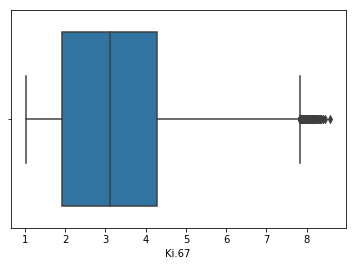

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(x=cell_lines_data['Ki.67'])
plt.show()

In [0]:
Q1 = cell_lines_data.quantile(0.25)
Q3 = cell_lines_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

time               17.000000
b.CATENIN           0.884277
cleavedCas          1.523438
CyclinB             1.564453
GAPDH               1.442383
IdU                 1.750000
Ki.67               2.362305
p.4EBP1             1.722656
p.Akt.Ser473.       1.896484
p.AKT.Thr308.       1.380859
p.AMPK              1.027344
p.BTK               1.277344
p.CREB              1.191406
p.ERK               1.617188
p.FAK               1.276367
p.GSK3b             1.742188
p.H3                1.534180
p.HER2              1.292969
p.JNK               1.288086
p.MAP2K3            1.154785
p.MAPKAPK2          1.199219
p.MEK               0.988281
p.MKK3.MKK6         1.457031
p.MKK4              1.619141
p.NFkB              0.921875
p.p38               1.560547
p.p53               1.416016
p.p90RSK            1.992188
p.PDPK1             1.433594
p.PLCg2             2.011719
p.RB                2.628906
p.S6                2.644531
p.S6K               1.174805
p.SMAD23            1.307617
p.SRC         

In [0]:
print(cell_lines_data < (Q1 - 1.5 * IQR)) |(cell_lines_data > (Q3 + 1.5 * IQR))

         time  b.CATENIN  ...  treatment_EGF  treatment_full
0       False      False  ...          False           False
1       False      False  ...          False           False
2       False      False  ...          False           False
3       False      False  ...          False           False
4       False      False  ...          False           False
5       False      False  ...          False           False
6       False      False  ...          False           False
7       False      False  ...          False           False
8       False      False  ...          False           False
9       False      False  ...          False           False
10      False      False  ...          False           False
11      False      False  ...          False           False
12      False      False  ...          False           False
13      False      False  ...          False           False
14      False      False  ...          False           False
15      False      False

TypeError: ignored

In [0]:
cell_lines_data= cell_lines_data[~((cell_lines_data < (Q1 - 1.5 * IQR)) |(cell_lines_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [0]:
cell_lines_data.shape

(3123339, 44)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [0]:
cell_lines_data.head()

,time,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,p.AKT.Thr308.,p.AMPK,p.BTK,p.CREB,p.ERK,p.FAK,p.GSK3b,p.H3,p.HER2,p.JNK,p.MAP2K3,p.MAPKAPK2,p.MEK,p.MKK3.MKK6,p.MKK4,p.NFkB,p.p38,p.p53,p.p90RSK,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5,treatment_iEGFR,treatment_iMEK,treatment_iPI3K,treatment_iPKC,treatment_EGF,treatment_full
36621,0.0,1.688477,3.845703,2.515625,3.591797,6.027344,4.480469,4.535156,3.810547,3.560547,4.296875,4.093750,2.406250,3.962891,2.208984,2.935547,3.652344,5.289062,3.478516,2.390625,3.070312,2.634766,3.490234,4.617188,3.884766,2.607422,2.736328,4.566406,2.554688,3.412109,4.328125,5.457031,3.537109,3.019531,3.021484,3.724609,2.013672,2.429688,0,0,0,0,1,0
36622,0.0,0.724609,3.158203,1.881836,3.322266,4.250000,2.494141,2.882812,1.825195,2.966797,3.720703,3.308594,0.342773,3.412109,2.406250,2.751953,2.171875,4.957031,2.658203,0.451660,0.499023,2.425781,2.636719,3.177734,1.857422,1.881836,2.259766,3.230469,1.853516,1.074219,5.195312,3.121094,2.425781,1.933594,0.554199,1.612305,2.392578,2.392578,0,0,0,0,1,0
36624,0.0,1.544922,3.087891,2.962891,3.257812,4.250000,3.794922,4.468750,3.601562,2.693359,4.152344,4.515625,1.091797,4.218750,2.779297,4.007812,3.476562,4.792969,2.121094,1.424805,3.439453,3.066406,2.511719,4.484375,3.603516,2.943359,3.031250,5.437500,2.232422,3.322266,3.802734,8.203125,2.925781,2.060547,3.203125,3.439453,3.939453,2.419922,0,0,0,0,1,0
36627,0.0,1.393555,2.212891,1.205078,3.574219,5.105469,3.412109,3.593750,2.523438,2.675781,3.339844,3.306641,0.342773,2.521484,2.085938,1.711914,3.619141,4.679688,1.816406,1.195312,1.751953,2.423828,2.753906,2.750000,3.019531,0.960938,2.226562,2.830078,2.220703,1.970703,4.085938,6.167969,2.718750,2.796875,2.044922,2.988281,3.359375,1.941406,0,0,0,0,1,0
36628,0.0,0.473145,3.291016,2.251953,3.326172,5.503906,6.347656,4.753906,1.800781,3.207031,4.308594,3.957031,1.287109,3.259766,2.587891,2.539062,2.443359,4.054688,2.806641,1.525391,3.220703,2.644531,2.691406,3.947266,3.097656,2.318359,3.634766,4.187500,2.291016,0.986328,4.515625,5.515625,2.255859,2.601562,2.593750,3.146484,3.244141,2.146484,0,0,0,0,1,0


In [0]:
markers =  ['p.ERK', 'p.PLCg2', 'p.HER2', 'p.S6', 'p.Akt.Ser473.']
y = cell_lines_data[markers]

In [0]:
temp = set(cell_lines_data.columns.values) - set(markers)
X = cell_lines_data[list(temp)]

In [0]:
y.describe()

,p.ERK,p.PLCg2,p.HER2,p.S6,p.Akt.Ser473.
count,3.123339e+06,2.797043e+06,2.436967e+06,3.123339e+06,3.123339e+06
mean,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,-1.384277e-01,3.581543e-01,1.826172e+00,1.907227e+00,4.484863e-01
25%,2.826172e+00,1.555664e+00,3.919922e+00,4.695312e+00,3.007812e+00
50%,3.490234e+00,2.544922e+00,4.535156e+00,5.933594e+00,3.892578e+00
75%,4.050781e+00,3.476562e+00,5.121094e+00,6.882812e+00,4.632812e+00
max,6.281250e+00,6.402344e+00,7.000000e+00,1.009375e+01,7.339844e+00


In [0]:
X_train, X_test_vald, y_train, y_test_vald = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [0]:
X_vald, X_test, y_vald, y_test = train_test_split(
    X_test_vald, y_test_vald, test_size=0.3, random_state=42)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
X_train = scaler.transform(X_train.values)
X_vald = scaler.transform(X_vald.values)
X_test = scaler.transform(X_test.values)

In [0]:
print(X_train.shape)
print(X_vald.shape)
print(X_test.shape)

(2186337, 39)
(655901, 39)
(281101, 39)


In [0]:
clfs = list()
for cl in markers:
  print("***********   "  +cl+ "  *******")
  plc_ind  = np.where(y_train[cl].isnull() == False)[0]
  plc_data = X_train[plc_ind]
  plc_train_y = y_train.iloc[plc_ind][cl]

  plc_test_ind = np.where(y_test[cl].isnull() == False)[0]
  plc_test_data = X_test[plc_test_ind]

  temp_clf = linear_model.SGDRegressor(max_iter=1, tol=1e-3)
  count = 0
  size = plc_data.shape[0]
  
  while(count < size):
    temp_clf.partial_fit(plc_data[count:count+size//10, :],  plc_train_y[count:count+size//10])
    count += size//10
  
  clfs.append(temp_clf)
  
  plc_ind  = np.where(y_vald[cl].isnull() == False)[0]
  
  plc_pred = temp_clf.predict(X_vald[plc_ind])

  plc_pred_train = temp_clf.predict(plc_data)
  plc_pred_test = temp_clf.predict(plc_test_data)
 
  print("rmse score (train): "+str(np.sqrt(mean_squared_error(plc_train_y, plc_pred_train))))
  print("r2 score (train): "+str(r2_score(plc_train_y, plc_pred_train)))

  print("rmse score (vald): "+str(np.sqrt(mean_squared_error(y_vald.iloc[plc_ind][cl], plc_pred))))
  print("r2 score (vald): "+str(r2_score(y_vald.iloc[plc_ind][cl], plc_pred)))
  
  print("rmse score (test): "+str(np.sqrt(mean_squared_error(y_test.iloc[plc_test_ind][cl], plc_pred_test))))
  print("r2 score (test): "+str(r2_score(y_test.iloc[plc_test_ind][cl], plc_pred_test)))
  

***********   p.ERK  *******
rmse score (train): 0.6202223278316227
r2 score (train): 0.5648805607001011
rmse score (vald): 0.6213139505207969
r2 score (vald): 0.5650178101943857
rmse score (test): 0.6208135271220953
r2 score (test): 0.5643799711029255
***********   p.PLCg2  *******
rmse score (train): 0.7310839232562575
r2 score (train): 0.621301876077792
rmse score (vald): 0.7309378968263586
r2 score (vald): 0.6212471433142142
rmse score (test): 0.730474487516016
r2 score (test): 0.6220316976274518
***********   p.HER2  *******
rmse score (train): 0.5272394246257504
r2 score (train): 0.6431832232133095
rmse score (vald): 0.5286155008057098
r2 score (vald): 0.6422610044996748
rmse score (test): 0.52779498326416
r2 score (test): 0.6448285674130697
***********   p.S6  *******
rmse score (train): 1.0721195975387152
r2 score (train): 0.481215268883289
rmse score (vald): 1.0728725381499906
r2 score (vald): 0.4816261912582719
rmse score (test): 1.0743921634626854
r2 score (test): 0.48058989

In [0]:

svm_clfs = dict()

for cl in markers:
  print("***********   "  +cl+ "  *******")

  temp_clf = LinearSVR(random_state=0, tol=1e-5, max_iter=1500)
  count = 0
  
  temp_clf.fit(X_train3,  y_train3[cl])

  svm_clfs[cl] = temp_clf
  
  plc_pred = temp_clf.predict(X_train1)
  count = 0
  plc_pred_train = temp_clf.predict(X_train3)

  print("rmse score (vald): "+str(np.sqrt(mean_squared_error(y_train1[cl], plc_pred))))
  print("r2 score (vald): "+str(r2_score(y_train1[cl], plc_pred)))
  
  print("rmse score (train): "+str(np.sqrt(mean_squared_error(y_train3[cl], plc_pred_train))))
  print("r2 score (train): "+str(r2_score(y_train3[cl], plc_pred_train)))

***********   p.ERK  *******


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


rmse score (vald): 0.690944432488308
r2 score (vald): 0.61385521112211
rmse score (train): 0.6904028220630919
r2 score (train): 0.614107335865452
***********   p.PLCg2  *******


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


rmse score (vald): 0.7637210496584734
r2 score (vald): 0.6002748326493125
rmse score (train): 0.7646332986972904
r2 score (train): 0.599231234107926
***********   p.HER2  *******


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


rmse score (vald): 0.5751781321430123
r2 score (vald): 0.6577965847994878
rmse score (train): 0.5753036561829721
r2 score (train): 0.6572500354389266
***********   p.S6  *******
rmse score (vald): 1.1727977807959944
r2 score (vald): 0.4910044660994708
rmse score (train): 1.1726794825898224
r2 score (train): 0.49052802018726416
***********   p.Akt.Ser473.  *******


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


rmse score (vald): 0.7671429093543211
r2 score (vald): 0.6239265134423846
rmse score (train): 0.767771567329113
r2 score (train): 0.6234751943432548
